![](../src/image/meli1.JPG)

<a id="0"></a> <br>
# DATA ANALYTICS ENGINNER CHALLENGE

### En este desafio nos desenvolveremos a travez de una problematica de clusterizacion de sellers, con el fin de generar alto valor al negocio, ya que la importancia de tener una buena clasificacion de los sellers permite al negocio realizar estrategia optimas y que generen lo esperado.

### En este paso estaremos aplicando un crips-dm con el fin de darle un  orden claro y consiso al projecto.

### En esta ocasion segmentaremos los sellers de MELI, teniendo en cuenta que MELI, es un e-commerce amplio que ha crecido exponencialmente a traves del tiempo, lo que ha captado mas sellers y transacciones por minuto, y globalizado en el mercado LatinoAmericano, y aun sigue en aumento. Como todo negocio es importante conocer las caracteristicas de nuestros clientes en este caso los seller, sus comportamiento, sus capacidades de transacciones, sus productos sus categorias, por tal razon es necesario tener una clasificacion optima de nuestros sellers para poder realizar actividades, acciones dirigidas a un tipo o algunos tipos de sellers especificos, para que se pueda cumplir con lo esperado y optimizarlos recurso siendo estas actividades enfocadas.



### Este ejercicio se dividira en los siguientes pasos

1. [Entendimiento de los datos](#1-entendimiento-de-los-datos)
1. [Limpieza de datos](#2-limpieza-de-los-datos)
1. [Preparacion de los datos](#3-preparacion-de-los-datos)
1. [Modelado y Entranamiento del Algoritmo](#4-modelado-y-entranamiento-del-algoritmo)
1. [Analisis y Conclusiones](#5-analisis-y-conclusiones)

<a id="1"></a> <br>
# 1. Entendimiento de los datos

### La fuente de datos es un csv, con 14 variables y 185250 registros, en el encontramos variables categoricas y numericas. encotramos los productos y sus caracteristicas como inventario y precios, esto de los sellers, lo cual tenemos el mismo seller con diferente producto, se tambien se tiene que tenemos varias catergorias y una reputacion de seller que es como una puntuacion. Ya teniendo esto se realizaran transformaciones a la Data para por encontrar una mejor en las varibles y tambien crear variables nuevas que permitan tener mas informacion que se pueda modelar.

In [66]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

"""Libreias.

Importamos librerias para la exploracion de los datos
-pandas, para el tratamientos de los datos
-os, para el manejo sitrma operativo
-pathlib, para el manejo de rutas
"""

'Libreias.\n\nImportamos librerias para la exploracion de los datos\n-pandas, para el tratamientos de los datos\n-os, para el manejo sitrma operativo\n-pathlib, para el manejo de rutas\n'

In [67]:
# leemos e importamos a un DF el archivo fuents .csv

root = Path('.').resolve().parent
filename = "df_challenge_meli_base.csv"
pr = os.path.join(root,'src','data', 'raw',filename)
pr

'D:\\Clustering_MeLi\\src\\data\\raw\\df_challenge_meli_base.csv'

In [68]:
#Leemos el archivo en un Dataframe

DF = pd.read_csv(pr,delimiter=',', encoding='Latin-1', header=0)
print(DF.shape)
DF.head(2)

(185250, 14)


,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name
0,2024-08-01,5a39342818,Gel Cerave Limpiador Espumoso Piel Normal A Gr...,green_platinum,16155,FBM,new,False,260.93,355.0,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-17883...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA
1,2024-08-01,5a39342818,Kit Garnier Express Aclara Serum +crema +gel C...,green_platinum,6253,FBM,new,False,344.26,NaN,BEAUTY PERSONAL CARE,https://articulo.mercadolibre.com.mx/MLM-31259...,BEAUTY PERSONAL CARE,CUIDADO PERSONAL Y BELLEZA


In [69]:
# Informacion de las variables
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185250 entries, 0 to 185249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tim_day            185250 non-null  object 
 1   seller_nickname    185250 non-null  object 
 2   titulo             185250 non-null  object 
 3   seller_reputation  182878 non-null  object 
 4   stock              185250 non-null  int64  
 5   logistic_type      185250 non-null  object 
 6   condition          185250 non-null  object 
 7   is_refurbished     185250 non-null  bool   
 8   price              183734 non-null  float64
 9   regular_price      49956 non-null   float64
 10  categoria          185250 non-null  object 
 11  url                185250 non-null  object 
 12  category_id        185250 non-null  object 
 13  category_name      185250 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 18.6+ MB


In [70]:
# Descripcion de las variables numericas
DF.describe()

,stock,price,regular_price
count,185250.000000,1.837340e+05,49956.000000
mean,307.017090,3.701531e+04,1614.429170
std,3367.216679,1.124158e+07,8408.645951
min,0.000000,0.000000e+00,6.100000
25%,2.000000,2.700000e+02,278.672500
50%,8.000000,5.681000e+02,499.000000
75%,42.000000,1.387000e+03,1099.990000
max,99999.000000,4.772354e+09,999999.000000


<a id="2"></a> <br>
# 2. Limpieza de los Datos.

#### Se puede observar que en la descripcion anterior notamos que hay datos que imputar ya que hay datos faltantes en "Price y regular_price"

In [71]:
# Calculo el porcentaje de null en las variables tanto numericas como categoricas
data_null = round(100*(DF.isnull().sum())/len(DF), 2)
data_null

tim_day               0.00
seller_nickname       0.00
titulo                0.00
seller_reputation     1.28
stock                 0.00
logistic_type         0.00
condition             0.00
is_refurbished        0.00
price                 0.82
regular_price        73.03
categoria             0.00
url                   0.00
category_id           0.00
category_name         0.00
dtype: float64

In [72]:
# Eliminaremos las filas que tienen datos faltantes
DF = DF.dropna()
DF.shape

(49956, 14)

<a id="3"></a> <br>
# 3. Preparacion de los Datos

#### Ahora la preparacion de los datos que seran para el entrenamiento de los modelos, me basare en las variables numericas, que serian: 

#### Explicitas
1. stock
1. price
1. regular_price

#### Implicitas, serian las nuevas variables. se agrupara por "seller_nickname" para realizar las operacion necesarias
1. total_amount =  sum(stock) * sum(price)
1. total_amount_regular = sum(stock) * sum(price)
1. cantidad de productos = conteo por cliente ( o conteo de productos)


In [73]:
# selecionaremos las variables para obtener las nuevas variables:
# 'seller_nickname', 'stock', 'price', 'regular_price'

#nuevo DF
columns = ['seller_nickname','stock', 'price', 'regular_price']
dfv2 = DF[columns]
dfv2['Products'] = 1 #creamos una columna productos con el valor de uno para agrupar y obtener products que es la cantidad de productos que tiene el seller
dfv2.head(2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24420\2601917602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['Products'] = 1 #creamos una columna productos con el valor de uno para agrupar y obtener products que es la cantidad de productos que tiene el seller


,seller_nickname,stock,price,regular_price,Products
0,5a39342818,16155,260.93,355.0,1
2,66d9659692,10066,363.00,660.0,1


In [74]:
#realizamos la agrupacion
dfv2 = dfv2.groupby('seller_nickname').sum() 
#calculamos las nuevas variables
dfv2['total_amount'] = dfv2['stock'] * dfv2['price']
dfv2['regular_total_amount'] = dfv2['price'] * dfv2['regular_price']
dfv2.head(2)

,stock,price,regular_price,Products,total_amount,regular_total_amount
seller_nickname,,,,,,
000e60a7db,2286,1030.53,2583.58,8,2355791.58,2.662457e+06
0010978f04,388,259.12,528.00,2,100538.56,1.368154e+05


In [75]:
dfv2.describe()

,stock,price,regular_price,Products,total_amount,regular_total_amount
count,1.415500e+04,1.415500e+04,1.415500e+04,14155.000000,1.415500e+04,1.415500e+04
mean,1.609404e+03,4.554182e+03,5.697663e+03,3.529212,2.304372e+07,8.825279e+08
std,1.563248e+04,2.652981e+04,3.264824e+04,6.386135,6.208036e+08,2.763578e+10
min,0.000000e+00,9.500000e+00,1.000000e+01,1.000000,0.000000e+00,9.500000e+01
25%,1.200000e+01,3.474650e+02,4.676500e+02,1.000000,7.412900e+03,1.610514e+05
50%,5.900000e+01,8.502900e+02,1.109000e+03,2.000000,4.781160e+04,9.231291e+05
75%,2.750000e+02,2.524425e+03,3.179320e+03,4.000000,4.229592e+05,7.923581e+06
max,1.056362e+06,1.449751e+06,1.809002e+06,256.000000,5.800432e+10,2.622602e+12


In [76]:
dfv2.columns

Index(['stock', 'price', 'regular_price', 'Products', 'total_amount',
       'regular_total_amount'],
      dtype='object')

Text(0.5, 0, 'Attributes')

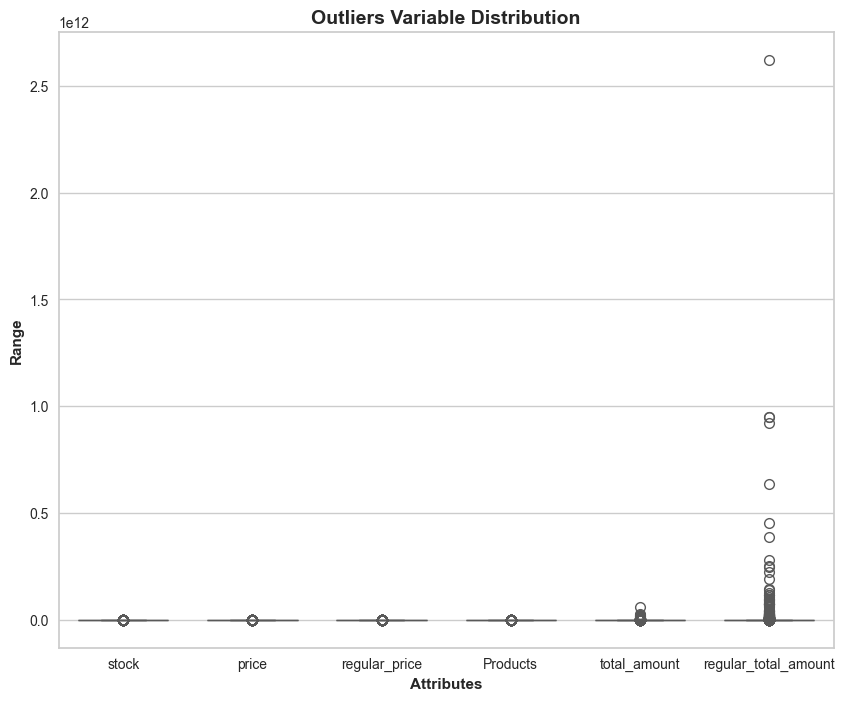

In [77]:
# Gráfico de cajas de Variables numericas con cajas 'stock', 'price', para ver los outliers
attributes = ['stock', 'price', 'regular_price', 'Products', 'total_amount',
       'regular_total_amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = dfv2[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [78]:
#removemos los outliers
#regular_total_amount
Q1 = dfv2.regular_total_amount.quantile(0.05)
Q3 = dfv2.regular_total_amount.quantile(0.95)
IQR = Q3 - Q1
dfv2 = dfv2[(dfv2.regular_total_amount >= Q1 - 1.5*IQR) & (dfv2.regular_total_amount <= Q3 + 1.5*IQR)]

#total_amount
Q1 = dfv2.total_amount.quantile(0.05)
Q3 = dfv2.total_amount.quantile(0.95)
IQR = Q3 - Q1
dfv2 = dfv2[(dfv2.total_amount >= Q1 - 1.5*IQR) & (dfv2.total_amount <= Q3 + 1.5*IQR)]

dfv2.shape


(13370, 6)

Text(0.5, 0, 'Attributes')

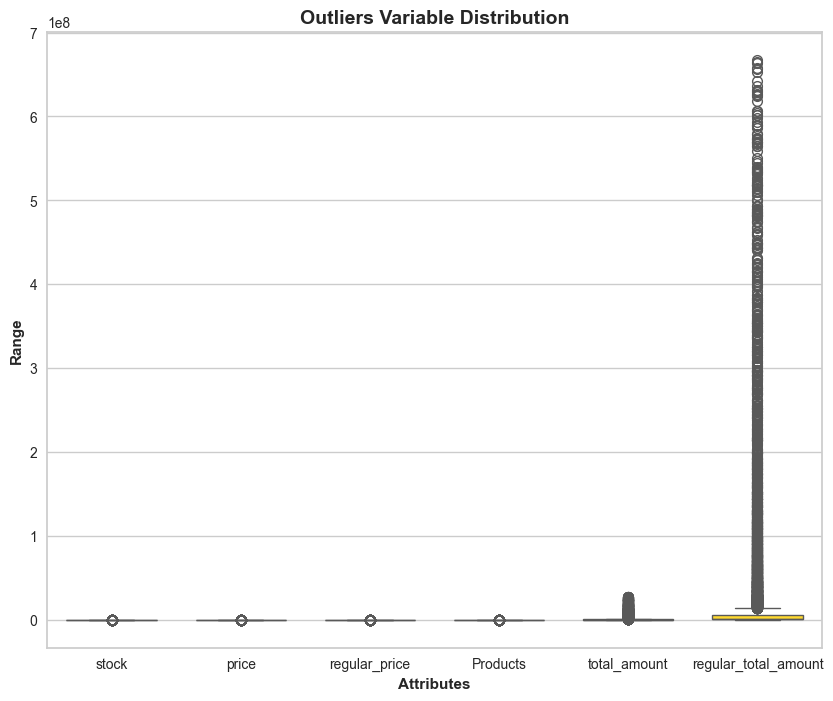

In [79]:
# Gráfico de cajas de Variables numericas con cajas 'stock', 'price', para ver los outliers
attributes = ['stock', 'price', 'regular_price', 'Products', 'total_amount',
       'regular_total_amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = dfv2[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

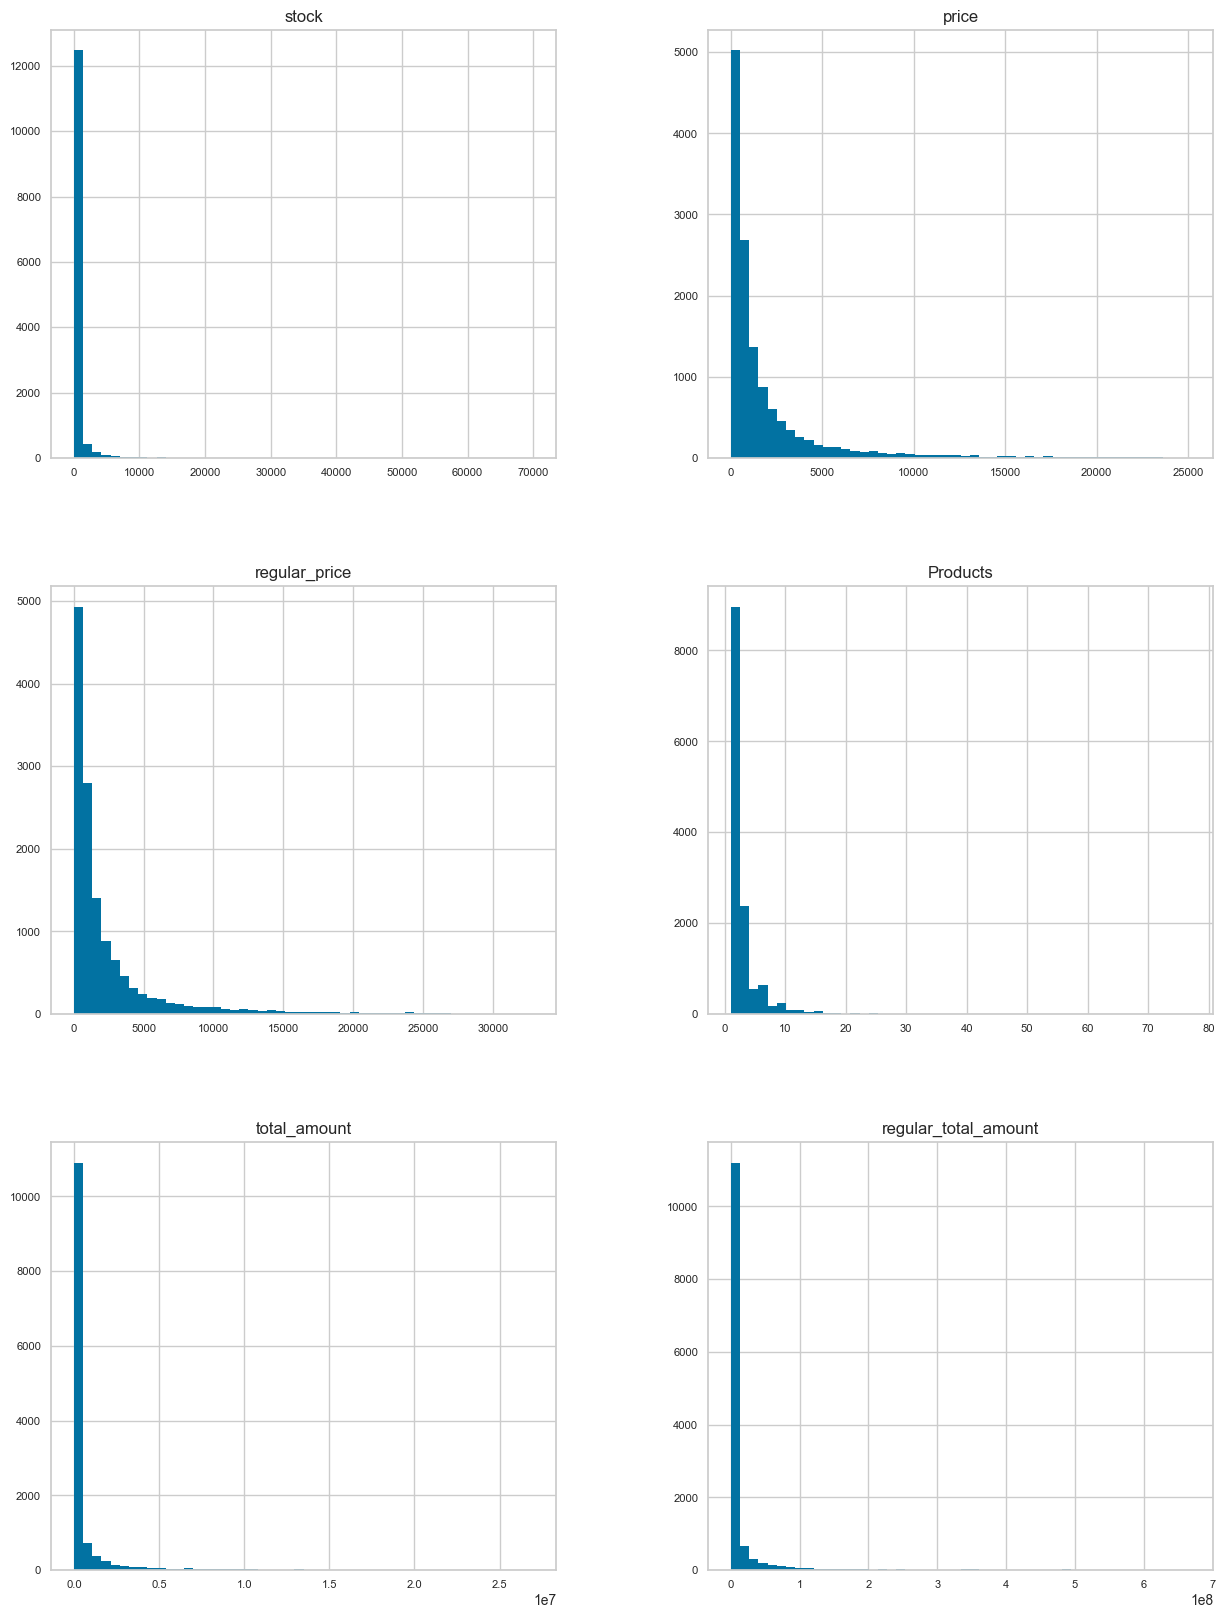

In [80]:
# Analisis de distribucion por cada varaibale

dfv2.hist(figsize=(15,20), bins=50, xlabelsize=8,ylabelsize=8);

In [81]:
corr = round(dfv2.corr(),3)
corr.style.background_gradient()

,stock,price,regular_price,Products,total_amount,regular_total_amount
stock,1.000000,-0.009000,-0.010000,0.082000,0.591000,-0.019000
price,-0.009000,1.000000,0.978000,0.488000,0.328000,0.919000
regular_price,-0.010000,0.978000,1.000000,0.486000,0.327000,0.912000
Products,0.082000,0.488000,0.486000,1.000000,0.417000,0.381000
total_amount,0.591000,0.328000,0.327000,0.417000,1.000000,0.268000
regular_total_amount,-0.019000,0.919000,0.912000,0.381000,0.268000,1.000000


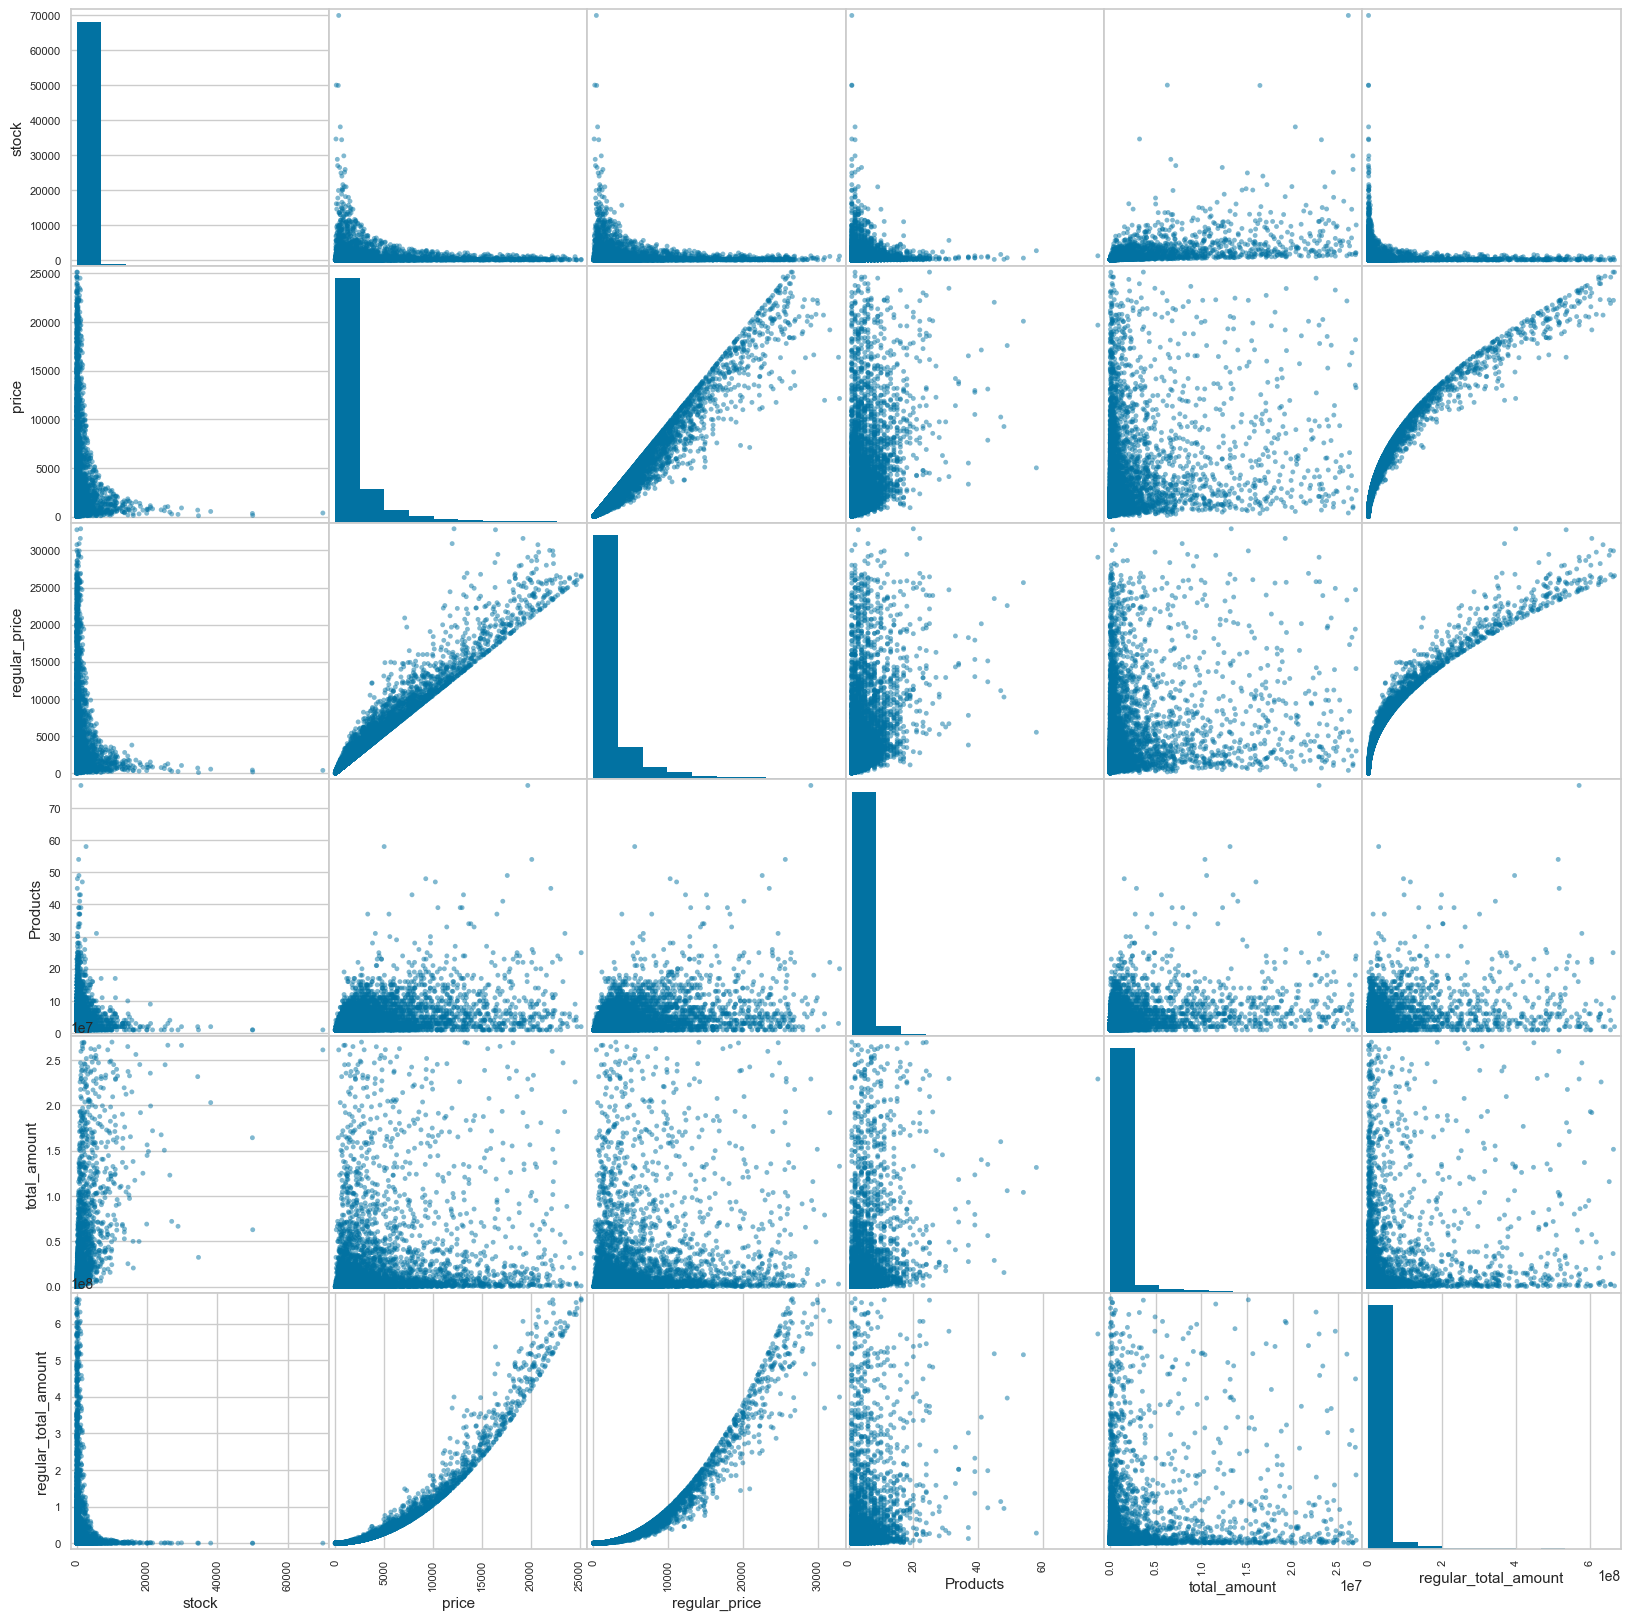

In [82]:
pd.plotting.scatter_matrix(dfv2, figsize=(20, 20));

- ### Escalaremos con StandardScaler los datos
- ### Creare el subset para utilizar un PCA

In [83]:
from sklearn.preprocessing import  StandardScaler
X=dfv2.copy()


In [84]:
ss= StandardScaler().fit_transform(X)
X = pd.DataFrame(ss,columns=X.columns)
X 


,stock,price,regular_price,Products,total_amount,regular_total_amount
0,1.000083,-0.295773,0.012895,1.549360,0.507512,-0.238816
1,-0.038992,-0.527801,-0.492559,-0.231779,-0.262739,-0.277321
2,-0.250859,-0.148835,-0.229207,-0.528635,-0.296558,-0.242376
3,-0.242647,-0.571901,-0.591655,-0.528635,-0.296462,-0.279192
4,-0.165455,-0.219408,-0.144703,0.361934,-0.228204,-0.241366
...,...,...,...,...,...,...
13365,-0.112899,-0.492468,-0.490100,-0.231779,-0.264536,-0.276318
13366,-0.246479,-0.199953,-0.253796,-0.528635,-0.292930,-0.248576
13367,-0.180784,-0.341297,-0.352159,-0.231779,-0.258341,-0.264676
13368,-0.061985,1.076375,1.128374,0.658790,0.363792,0.327640


### debido a tantas variables se realizara reduccion de dimensionalidad para poder manejar los clusters.

### Es necesario realizar la varianza acumulativa explicada para saber cuantas componentes son necesarias.

In [85]:
from sklearn.decomposition import PCA
import numpy as np

In [86]:
pca = PCA(n_components=None)
sklearn_transf = pca.fit_transform(X)
varianza_expl = pca.explained_variance_ratio_
varianza_expl

array([0.55822535, 0.25412885, 0.11702569, 0.05113435, 0.01593601,
       0.00354974])

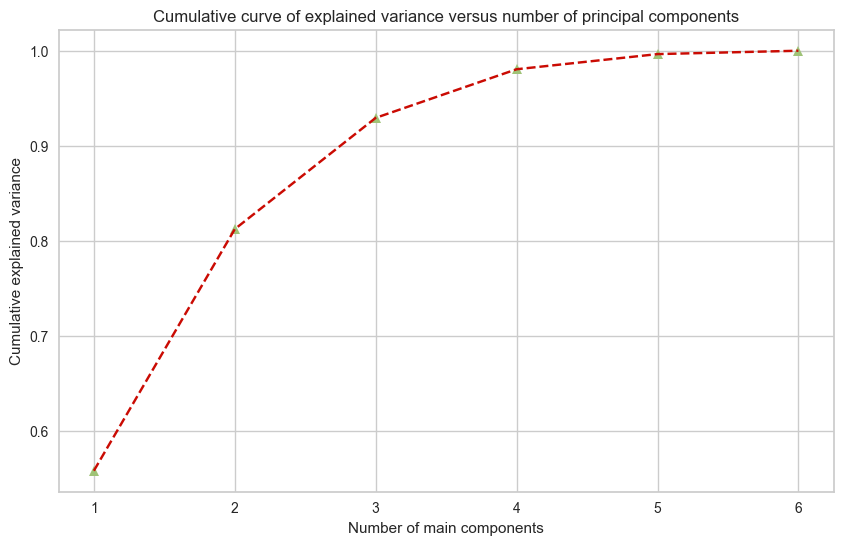

In [87]:
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

### Por lo que observamos se necesitan entre 2 y 3  componentes, para tener un 80% y 90% de varianza acumuculativa

In [88]:
pca2 = PCA(n_components = 2)
pca2.fit(X)
PCA_DF2=pd.DataFrame(pca2.transform(X), columns=['2col0','2col1',])

pca3 = PCA(n_components = 3)
pca3.fit(X)
PCA_DF3=pd.DataFrame(pca3.transform(X), columns=['3col0','3col1', '3col2'])

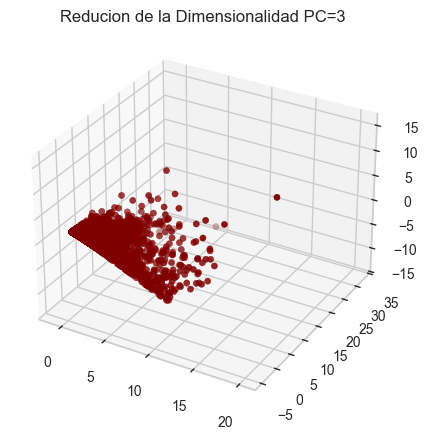

In [89]:
#Graficamos en 3d para PCA de 3
x =PCA_DF3["3col0"]
y =PCA_DF3["3col1"]
z =PCA_DF3["3col2"]
#To plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Reducion de la Dimensionalidad PC=3")
plt.show()

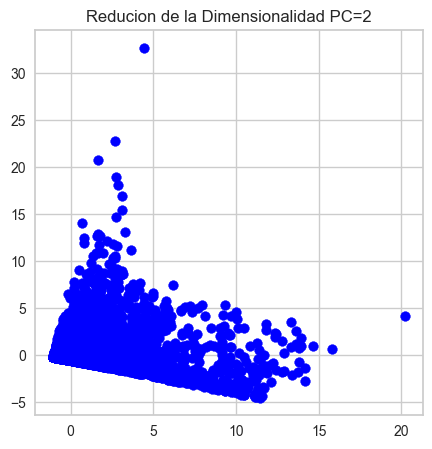

In [90]:
#Graficamos en 2d para PCA de 2
x =PCA_DF2["2col0"]
y =PCA_DF2["2col1"]

#To plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="blue", marker="o" )
ax.set_title("Reducion de la Dimensionalidad PC=2")
plt.show()

<a id="4"></a> <br>
# 4. Modelado y Entranamiento del Algoritmo

### Se debe buscar un algoritmo de clusterizacion no supervisado, ya que no se documenta las etiquetas en la informacion. para este caso usaremos los algoritmos de clusterizacion Kmean, Dbscan y aglomerativo. y evluaremos cual es el mejor.

In [91]:
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


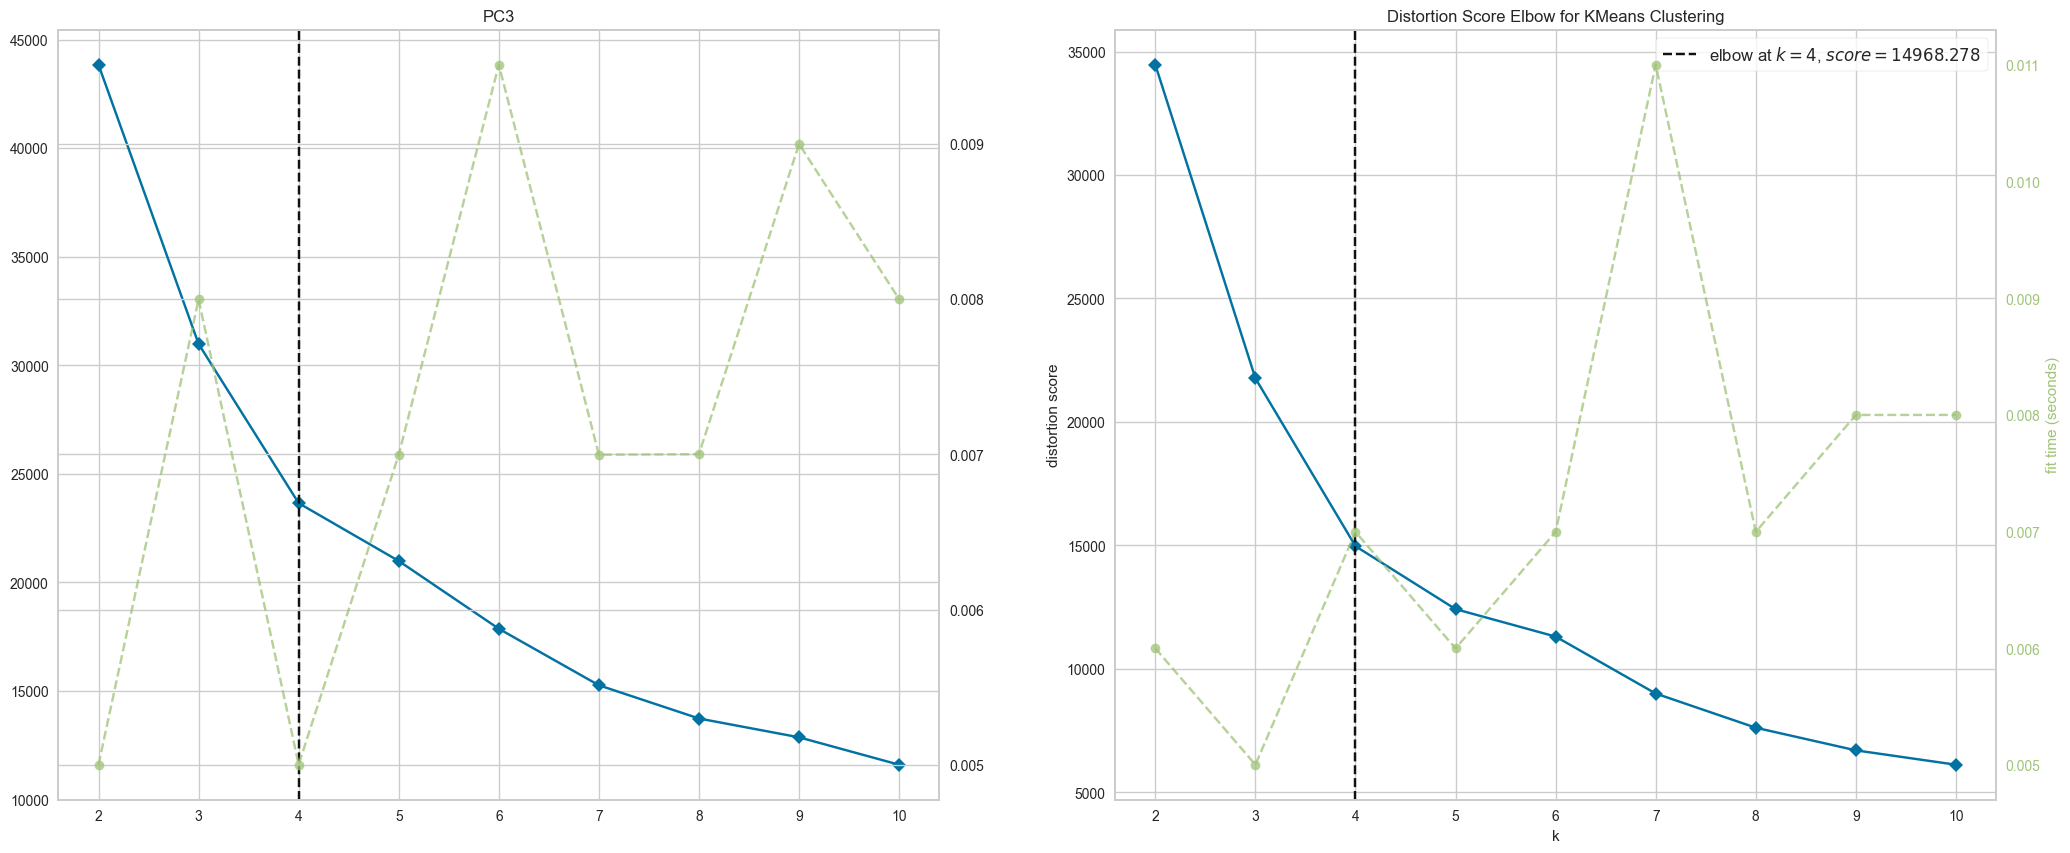

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
# Realizo la grafica del codo para saber cuantos cluster son necesarios, para PC = 3
fig, ax =plt.subplots(ncols=2,figsize=(25,10),sharex=False)
bow = KElbowVisualizer(KMeans(), ax=ax[0],k=10)
bow.fit(PCA_DF3)
ax[0].set_title('PC3')
bow = KElbowVisualizer(KMeans(), ax=ax[1], k=10)
bow.fit(PCA_DF2)
ax[1].set_title('PC2')
bow.show()

### Segun la grafica del codo se implementarias 5 clusters

## Kmeans

In [93]:
# inicializamos una instacia del Kmeans
cluster_Km3= KMeans(n_clusters=4)
cluster_Km3.fit_predict(PCA_DF3)
klabels3 = cluster_Km3.labels_
silhouette_avg = silhouette_score(PCA_DF3, klabels3)
print("Score(silouette_avg)PC3:",silhouette_avg)

cluster_Km2= KMeans(n_clusters=4)
cluster_Km2.fit_predict(PCA_DF2)
klabels2 = cluster_Km2.labels_
silhouette_avg = silhouette_score(PCA_DF2, klabels2)
print("Score(silouette_avg)PC2:",silhouette_avg)

Score(silouette_avg)PC3: 0.6734801633549544
Score(silouette_avg)PC2: 0.7090538225936313


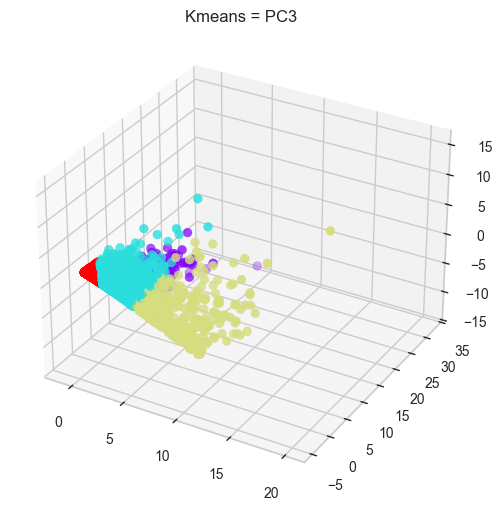

In [94]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=klabels3, marker='o', cmap = 'rainbow_r' )
ax.set_title("Kmeans = PC3")
plt.show()

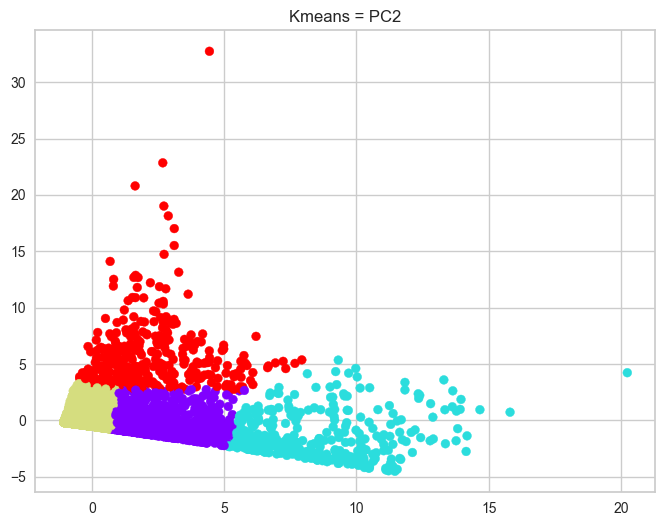

In [95]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=klabels2, marker='o', cmap = 'rainbow_r' )
ax.set_title("Kmeans = PC2")
plt.show()

# DBSCAN

In [96]:
db = DBSCAN(eps=0.9, min_samples=4)
db.fit(PCA_DF3)
dblabels3 = db.labels_
dblabels3
silhouette_avg = silhouette_score(PCA_DF3, dblabels3)
print("Score(silouette_avg)PC3:",silhouette_avg)

db = DBSCAN(eps=0.9, min_samples=4)
db.fit(PCA_DF2)
dblabels2 = db.labels_
dblabels2
silhouette_avg = silhouette_score(PCA_DF2, dblabels2)
print("Score(silouette_avg)PC2:",silhouette_avg)

Score(silouette_avg)PC3: 0.7356742914489447
Score(silouette_avg)PC2: 0.814121929080111


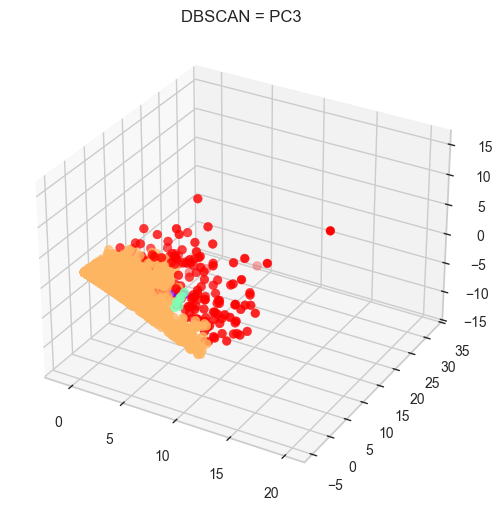

In [97]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=dblabels3, marker='o', cmap = 'rainbow_r' )
ax.set_title("DBSCAN = PC3")
plt.show()

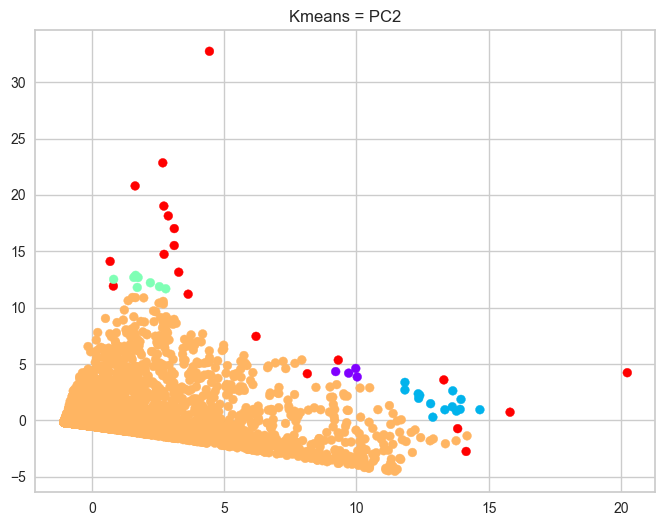

In [98]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=dblabels2, marker='o', cmap = 'rainbow_r' )
ax.set_title("Kmeans = PC2")
plt.show()

# AGLOMERATIVO

In [99]:
 
AgC3 = AgglomerativeClustering(n_clusters=4) #Inciamos el modelo para pc3
AgClabels3 = AgC3.fit_predict(PCA_DF3) #entrena el algoritmo
silhouette_avg = silhouette_score(PCA_DF3, AgClabels3)
print("Score(silouette_avg)PC3:",silhouette_avg)

AgC2 = AgglomerativeClustering(n_clusters=4)#Inciamos el modelo para pc2
# entrenamos el modelo
AgClabels2 = AgC2.fit_predict(PCA_DF2)
silhouette_avg = silhouette_score(PCA_DF2, AgClabels2)
print("Score(silouette_avg)PC2:",silhouette_avg)

Score(silouette_avg)PC3: 0.6291314975191212
Score(silouette_avg)PC2: 0.6275696057933282


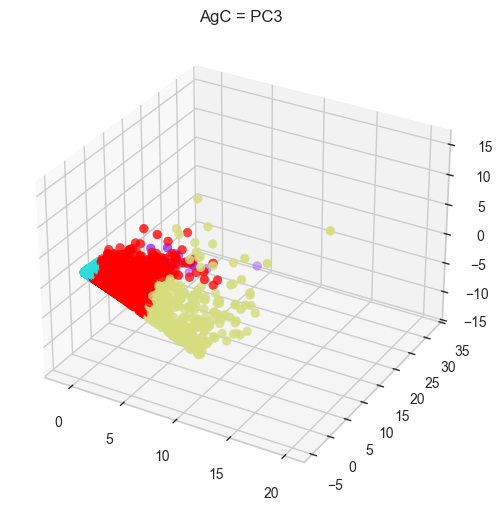

In [100]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=AgClabels3, marker='o', cmap = 'rainbow_r' )
ax.set_title("AgC = PC3")
plt.show()


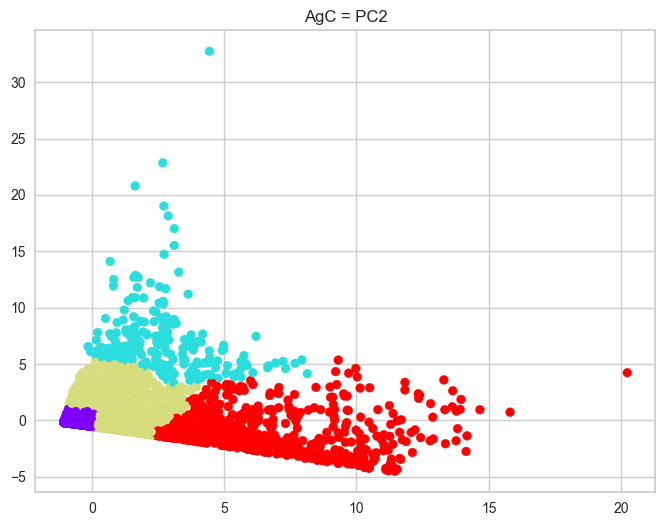

In [101]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=AgClabels2, marker='o', cmap = 'rainbow_r' )
ax.set_title("AgC = PC2")
plt.show()

### Concluyendo podemos ver que los modelos que mejor comportamiento tuvieron fueron el Kmean y el aglomerativo.

In [102]:
#Agregamos los clusters de Kmeans ya que tuvo el mejor resultado

dfv2['Kmeans'] = klabels2
dfv2['AgC'] =  AgClabels2
dfv2.head(2)

dfv3=dfv2.reset_index()
dfv3.columns
cols=['seller_nickname','Kmeans', 'AgC']



In [103]:
dfv3=dfv3[cols]

In [104]:
data_num=dfv2.reset_index()
data_num.to_csv('D:/Clustering_MeLi/src/data/processed/data_num.csv')

(13370, 8)


Text(0.5, 1.0, 'AgC')

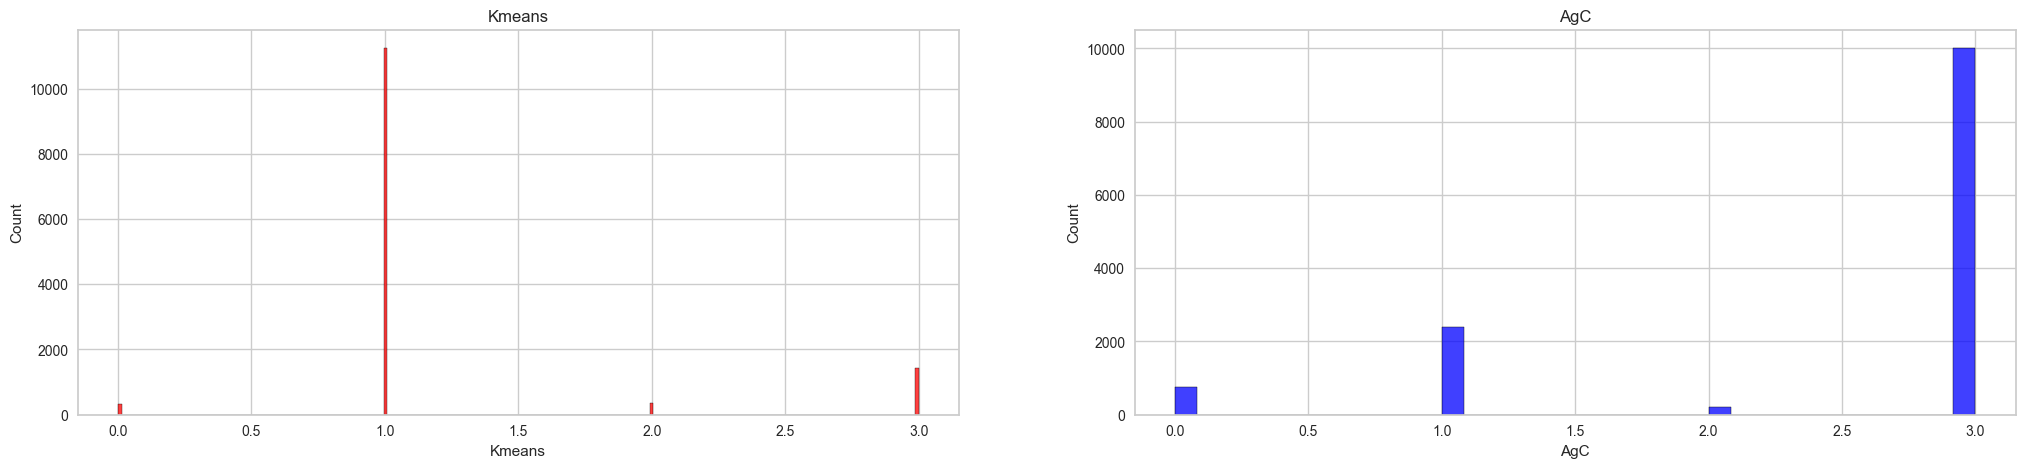

In [105]:
# la distribucion de  los grupos de Kmeans y Aglomerativo
print(dfv2.shape)
fig, ax =plt.subplots(ncols=2,figsize=(25,5),sharex=False)
sns.histplot(ax=ax[0], data = dfv2['Kmeans'],color='red')
ax[0].set_title('Kmeans')
sns.histplot(ax=ax[1], data = dfv2['AgC'],color='blue')
ax[1].set_title('AgC')

### Una vez terminado el modelado, viene el proceso de validacion y encontrar el patron que con el cual los algoritmos realizaron la clusterizacion, pues fue un proceso no supervisado. esto se hace de manera manual o apoyandose en matematicas y estadisticas. Se evaluan cada uno de los grupos.

### para finalizar se exporta la data con los clusters y el pkl de los algoritmos entrenados, para poder consumir en una api o utilizarlo.

In [106]:
import pickle

#exportamos el archivo con las predicciones de los modelos kemans (cluster_Km) y Aglomerativo(AgC).

#Exportar el archivo

dfv2.to_csv('D:/Clustering_MeLi/src/data/processed/resultado.csv')

#guardamos los Modelos
#pickle.dump(cluster_Km,open('km.sav','wb'))
#pickle.dump(AgC,open('AgC.sav','wb'))



In [107]:
df_meli=pd.merge(left=DF, right=dfv3, on='seller_nickname', how='left')
df_meli = df_meli.dropna()
print(df_meli.shape)
df_meli.head(2)

(37179, 16)


,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,regular_price,categoria,url,category_id,category_name,Kmeans,AgC
1,2024-08-01,66d9659692,3 Piezas De Minoxidil 5% Anacastel,green_platinum,10066,FBM,new,False,363.00,660.0,HAIR,https://articulo.mercadolibre.com.mx/MLM-19360...,HAIR,CUIDADO DEL CABELLO,0.0,2.0
8,2024-08-01,92a7303a20,Gama De 12 Geles Semipermanente Esmalte Obp - ...,green_platinum,3020,FBM,new,False,198.34,211.0,MANICURE & PEDICURE,https://articulo.mercadolibre.com.mx/MLM-13745...,MANICURE & PEDICURE,MANICURA Y PEDICURA,1.0,1.0


In [108]:
df_meli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37179 entries, 1 to 49955
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tim_day            37179 non-null  object 
 1   seller_nickname    37179 non-null  object 
 2   titulo             37179 non-null  object 
 3   seller_reputation  37179 non-null  object 
 4   stock              37179 non-null  int64  
 5   logistic_type      37179 non-null  object 
 6   condition          37179 non-null  object 
 7   is_refurbished     37179 non-null  bool   
 8   price              37179 non-null  float64
 9   regular_price      37179 non-null  float64
 10  categoria          37179 non-null  object 
 11  url                37179 non-null  object 
 12  category_id        37179 non-null  object 
 13  category_name      37179 non-null  object 
 14  Kmeans             37179 non-null  float64
 15  AgC                37179 non-null  float64
dtypes: bool(1), float64(4), int

In [109]:
#df_meli2.to_csv(os.path.join(root,'src','data','processed','Clusterizacion_Meli.csv'))

In [110]:
df_meli.to_csv(os.path.join(root,'src','data','processed','data_embedding.csv'))

<a id="5"></a> <br>
# 5. Analisis y Conclusiones